In [7]:
import numpy as np
ar=np.random.randint(1,101,(5,100))
avg_cl=np.mean(ar,axis=1)
print(avg_cl)
print("------------------------------")
std_arr=np.std(ar,axis=1)
print(std_arr)
print("------------------------------")
standarized=(ar-ar.mean())/ar.std()
print(standarized)

[50.07 52.87 47.65 48.09 50.37]
------------------------------
[29.99208396 26.8047216  29.77830586 29.24793839 29.02952118]
------------------------------
[[ 1.21124821 -0.13114111  0.72936486 -0.3032423   1.34892916  0.72936486
  -0.40650302 -1.30142923  1.21124821 -1.47353043  1.03914701 -0.33766254
   0.97030653 -1.57679114  1.14240773 -1.47353043  0.52284343  0.86704582
  -0.50976374  1.72755179  0.69494462 -0.06230063 -1.43911019  0.316322
  -0.33766254 -1.23258876  0.62610415 -0.44092326 -0.4753435  -0.19998159
  -1.47353043  0.90146606  0.79820534 -0.85396613  1.28008869  0.62610415
   1.52103036 -0.16556135  1.69313155  0.62610415  0.86704582  0.45400295
   0.55726367 -1.40468995  0.59168391 -0.85396613 -1.12932804 -0.57860422
  -1.54237091  0.55726367 -0.88838637 -0.06230063 -1.50795067 -0.85396613
  -1.12932804  1.28008869  0.55726367 -1.33584947 -0.3032423  -1.64563162
   0.59168391 -0.68186493 -0.99164708  1.41776964 -0.3032423  -0.75070541
  -1.40468995 -1.47353043 -0.027

In [11]:
import pandas as pd

data = {
    "age": [22, 25, 30, 35, 40, 45, 50, 28, 33, 38],
    "experience": [1, 2, 5, 7, 10, 12, 15, 4, 6, 9],
    "education_level": [1, 2, 3, 3, 4, 4, 4, 2, 3, 3],
    "salary": [3000, 3500, 5000, 6500, 8000, 9500, 12000, 4500, 6000, 7000]
}

df = pd.DataFrame(data)

income_per_experience=df["salary"]/(df["experience"]+1)
df["senior"]=(df["experience"]>5).astype(int)
corr=df.corr()
print(corr)
# salary more conneting with experience


                      age  experience  education_level    salary    senior
age              1.000000    0.998303         0.916921  0.992047  0.812328
experience       0.998303    1.000000         0.909805  0.992056  0.795929
education_level  0.916921    0.909805         1.000000  0.884576  0.778936
salary           0.992047    0.992056         0.884576  1.000000  0.774287
senior           0.812328    0.795929         0.778936  0.774287  1.000000


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = {
    "age": [22, 25, 30, 35, 40, 45, 50, 28, 33, 38],
    "experience": [1, 2, 5, 7, 10, 12, 15, 4, 6, 9],
    "education_level": [1, 2, 3, 3, 4, 4, 4, 2, 3, 3],
    "salary": [3000, 3500, 5000, 6500, 8000, 9500, 12000, 4500, 6000, 7000]
}

df = pd.DataFrame(data)
df["income_per_experience"]=df["salary"]/(df["experience"]+1)
x = df[["age", "experience", "education_level", "income_per_experience"]]
y = df["salary"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)




R² score: 0.9661198552488207


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy: 1.0
Precision: 0.0
Recall: 0.0


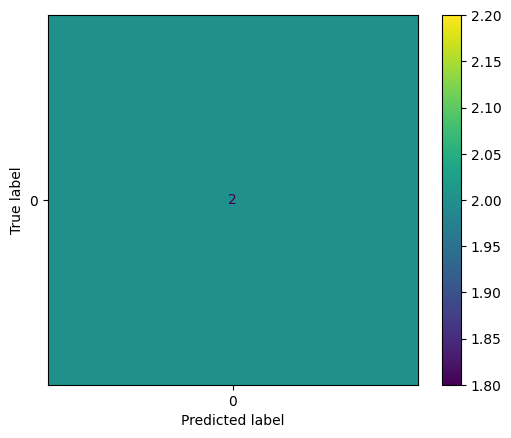

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


data = {
    "age": [22, 25, 30, 35, 40, 45, 50, 28, 33, 38],
    "experience": [1, 2, 5, 7, 10, 12, 15, 4, 6, 9],
    "education_level": [1, 2, 3, 3, 4, 4, 4, 2, 3, 3],
    "salary": [3000, 3500, 5000, 6500, 8000, 9500, 12000, 4500, 6000, 7000]
}

df = pd.DataFrame(data)

df["income_per_experience"] = df["salary"] / (df["experience"] + 1)


median_salary = df["salary"].median()
df["high_income"] = (df["salary"] > median_salary).astype(int)

X = df[["age", "experience", "education_level", "income_per_experience"]]
y = df["high_income"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


=== Accuracy Comparison ===
Logistic  - train: 1.000 | test: 1.000
RF        - train: 1.000 | test: 1.000

=== RandomForest Feature Importances ===
age                      0.344482
experience               0.301003
income_per_experience    0.270903
education_level          0.083612
dtype: float64


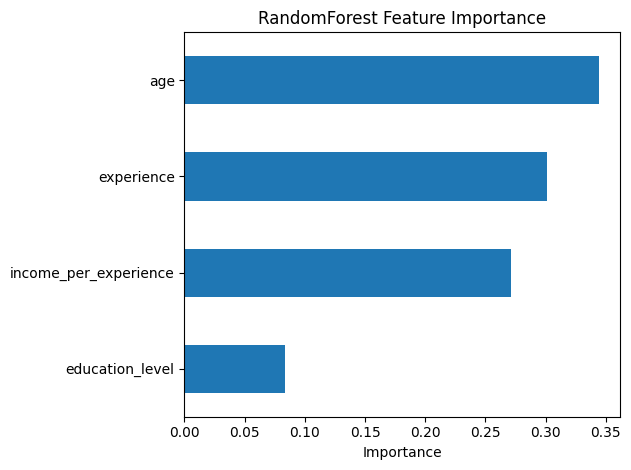

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = {
    "age": [22, 25, 30, 35, 40, 45, 50, 28, 33, 38],
    "experience": [1, 2, 5, 7, 10, 12, 15, 4, 6, 9],
    "education_level": [1, 2, 3, 3, 4, 4, 4, 2, 3, 3],
    "salary": [3000, 3500, 5000, 6500, 8000, 9500, 12000, 4500, 6000, 7000]
}

df = pd.DataFrame(data)

df["income_per_experience"] = df["salary"] / (df["experience"] + 1)

median_salary = df["salary"].median()
df["high_income"] = (df["salary"] > median_salary).astype(int)

X = df[["age", "experience", "education_level", "income_per_experience"]]
y = df["high_income"]



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred_log_train = log_model.predict(X_train)
y_pred_log_test = log_model.predict(X_test)

acc_log_train = accuracy_score(y_train, y_pred_log_train)
acc_log_test = accuracy_score(y_test, y_pred_log_test)


rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
rf_model.fit(X_train, y_train)

y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

acc_rf_train = accuracy_score(y_train, y_pred_rf_train)
acc_rf_test = accuracy_score(y_test, y_pred_rf_test)


print("=== Accuracy Comparison ===")
print(f"Logistic  - train: {acc_log_train:.3f} | test: {acc_log_test:.3f}")
print(f"RF        - train: {acc_rf_train:.3f} | test: {acc_rf_test:.3f}")



importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== RandomForest Feature Importances ===")
print(importances)


plt.figure()
importances.sort_values().plot(kind="barh")
plt.title("RandomForest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()





rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=4
)
